In [ ]:
/content/drive/MyDrive/pickle/test_images.pkl

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.exposure import equalize_hist
from PIL import Image
import pickle

In [ ]:
#Read pickle file
with open("/content/drive/MyDrive/pickle/test_images.pkl", "rb") as f:
  x_test = pickle.load(f)

x_test.shape

(120, 128, 128, 3)

In [ ]:
#Read pickle file
with open("/content/drive/MyDrive/pickle/test_labels.pkl", "rb") as f:
  y_test = pickle.load(f)

y_test.shape

(120,)

In [ ]:
#Read pickle file
with open("/content/drive/MyDrive/pickle/train_images.pkl", "rb") as f:
  x_train = pickle.load(f)

x_train.shape

(480, 128, 128, 3)

In [ ]:
#Read pickle file
with open("/content/drive/MyDrive/pickle/train_labels.pkl", "rb") as f:
  y_train = pickle.load(f)

y_train.shape

(480,)

In [ ]:
print(y_test)

['leopard' 'leopard' 'leopard' 'panda' 'hamster' 'cat' 'cat' 'duck'
 'panda' 'jellyfish' 'cat' 'crab' 'dog' 'crab' 'bear' 'dog' 'bear'
 'leopard' 'dog' 'crab' 'cat' 'duck' 'hamster' 'cat' 'dolphin' 'dog' 'dog'
 'dolphin' 'crab' 'dolphin' 'hamster' 'bear' 'panda' 'panda' 'duck'
 'panda' 'dolphin' 'dolphin' 'leopard' 'jellyfish' 'jellyfish' 'jellyfish'
 'panda' 'hamster' 'bear' 'cat' 'leopard' 'jellyfish' 'dog' 'crab'
 'hamster' 'hamster' 'dolphin' 'jellyfish' 'jellyfish' 'hamster' 'bear'
 'dog' 'bear' 'bear' 'duck' 'duck' 'hamster' 'bear' 'hamster' 'jellyfish'
 'dolphin' 'dolphin' 'dog' 'crab' 'cat' 'hamster' 'bear' 'bear' 'leopard'
 'duck' 'jellyfish' 'dolphin' 'hamster' 'dolphin' 'panda' 'jellyfish'
 'crab' 'crab' 'crab' 'crab' 'leopard' 'duck' 'panda' 'panda' 'jellyfish'
 'bear' 'duck' 'bear' 'duck' 'leopard' 'panda' 'panda' 'dolphin' 'hamster'
 'duck' 'leopard' 'cat' 'crab' 'panda' 'cat' 'duck' 'cat' 'leopard' 'dog'
 'dolphin' 'crab' 'cat' 'leopard' 'dog' 'duck' 'dog' 'cat' 'jellyfi

In [ ]:
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
# Normalize the pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
animal_labels = list(set(y_train))
animal_labels

['dolphin',
 'hamster',
 'crab',
 'jellyfish',
 'bear',
 'duck',
 'dog',
 'cat',
 'panda',
 'leopard']

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

num_classes = len(animal_labels)
# Convert class names to integer labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Perform one-hot encoding
num_classes = len(label_encoder.classes_)
y_train_one_hot = to_categorical(y_train_encoded, num_classes)
y_test_one_hot = to_categorical(y_test_encoded, num_classes)


In [ ]:
y_test_one_hot

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
# Retrieve class labels and their column indices
class_labels = label_encoder.classes_
column_indices = {class_label: column_index for column_index, class_label in enumerate(class_labels)}

# Print class labels and their column indices
for class_label in class_labels:
    print(f"Class: {class_label}, Column Index: {column_indices[class_label]}")


Class: bear, Column Index: 0
Class: cat, Column Index: 1
Class: crab, Column Index: 2
Class: dog, Column Index: 3
Class: dolphin, Column Index: 4
Class: duck, Column Index: 5
Class: hamster, Column Index: 6
Class: jellyfish, Column Index: 7
Class: leopard, Column Index: 8
Class: panda, Column Index: 9


In [ ]:
image_height = 128
image_width = 128


In [ ]:
# Build the CNN model
model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 dropout_17 (Dropout)        (None, 30, 30, 64)        0         
                                                                 
 flatten_10 (Flatten)        (None, 57600)           

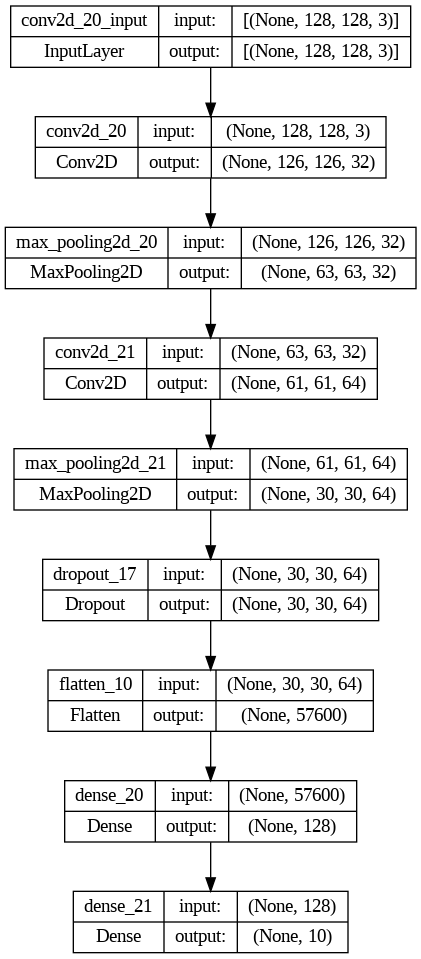

In [ ]:
import graphviz
from tensorflow.keras.utils import plot_model

# Generate a plot of the model architecture
plot_model(model, to_file='model_architecture.png', show_shapes=True)

# Alternatively, you can use graphviz to visualize the model architecture
# dot_model = tf.keras.utils.model_to_dot(model)
# graph = graphviz.Source(dot_model.to_string())
# graph.render('model_architecture', format='png', cleanup=True)


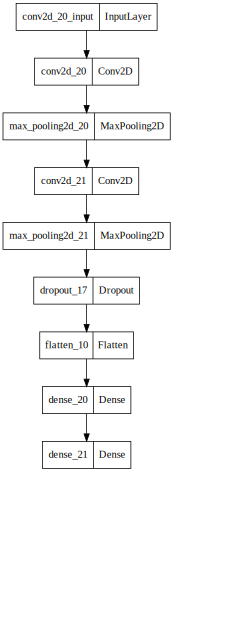

In [ ]:
graph

In [ ]:
# Train the model
model.fit(x_train, y_train_one_hot, epochs=15, batch_size=32, validation_split=0.3)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test_one_hot)



Epoch 1/15
11/11 [==============================] - 2s 51ms/step - loss: 3.3046 - accuracy: 0.1280 - val_loss: 2.1635 - val_accuracy: 0.2083
Epoch 2/15
11/11 [==============================] - 0s 29ms/step - loss: 2.1341 - accuracy: 0.2619 - val_loss: 2.0332 - val_accuracy: 0.2431
Epoch 3/15
11/11 [==============================] - 0s 29ms/step - loss: 1.8612 - accuracy: 0.3482 - val_loss: 1.8099 - val_accuracy: 0.3611
Epoch 4/15
11/11 [==============================] - 0s 25ms/step - loss: 1.4288 - accuracy: 0.5774 - val_loss: 1.8933 - val_accuracy: 0.3264
Epoch 5/15
11/11 [==============================] - 0s 26ms/step - loss: 1.0251 - accuracy: 0.7024 - val_loss: 1.5246 - val_accuracy: 0.4792
Epoch 6/15
11/11 [==============================] - 0s 25ms/step - loss: 0.6532 - accuracy: 0.8482 - val_loss: 1.8150 - val_accuracy: 0.4514
Epoch 7/15
11/11 [==============================] - 0s 27ms/step - loss: 0.3455 - accuracy: 0.9226 - val_loss: 1.7731 - val_accuracy: 0.4514
Epoch 8/15
11

In [ ]:
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)
predicted_labels

4/4 [==============================] - 0s 5ms/step


array([8, 8, 8, 9, 5, 1, 6, 0, 9, 7, 1, 2, 7, 2, 0, 3, 0, 6, 6, 2, 6, 5,
       1, 1, 1, 2, 3, 4, 2, 4, 2, 8, 6, 6, 5, 1, 4, 4, 8, 7, 7, 2, 1, 6,
       3, 6, 8, 7, 5, 2, 0, 5, 5, 7, 7, 3, 0, 3, 0, 9, 1, 8, 8, 0, 6, 7,
       4, 4, 2, 2, 1, 6, 8, 6, 8, 5, 7, 4, 5, 7, 1, 7, 2, 2, 8, 2, 8, 7,
       1, 1, 7, 0, 0, 5, 6, 8, 9, 6, 4, 4, 5, 8, 6, 2, 1, 1, 8, 1, 8, 6,
       5, 2, 1, 8, 9, 5, 6, 1, 7, 0])

In [ ]:
# Convert true labels to integer format
true_labels = np.argmax(y_test_one_hot, axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

In [ ]:
accuracy_score(true_labels, predicted_labels)

0.575

In [ ]:
f1_score(true_labels, predicted_labels, average='macro')

0.5615507529807732

In [ ]:
# Assuming you have already trained and evaluated your model

# Make predictions on the first images in the test set
num_images_to_predict = 20
x_pred = x_test[:num_images_to_predict]

# Perform predictions using the trained model
predictions = model.predict(x_pred)

# Retrieve the predicted labels
predicted_labels = np.argmax(predictions, axis=1)

# Map the predicted labels back to class names
predicted_class_names = label_encoder.inverse_transform(predicted_labels)

# Print the predictions
for i in range(num_images_to_predict):
    print(f"Image {i+1}: Predicted class - {predicted_class_names[i]}. Real class - {y_test[i]}")


1/1 [==============================] - 0s 182ms/step
Image 1: Predicted class - leopard. Real class - leopard
Image 2: Predicted class - leopard. Real class - leopard
Image 3: Predicted class - leopard. Real class - leopard
Image 4: Predicted class - panda. Real class - panda
Image 5: Predicted class - duck. Real class - hamster
Image 6: Predicted class - cat. Real class - cat
Image 7: Predicted class - hamster. Real class - cat
Image 8: Predicted class - bear. Real class - duck
Image 9: Predicted class - panda. Real class - panda
Image 10: Predicted class - jellyfish. Real class - jellyfish
Image 11: Predicted class - cat. Real class - cat
Image 12: Predicted class - crab. Real class - crab
Image 13: Predicted class - jellyfish. Real class - dog
Image 14: Predicted class - crab. Real class - crab
Image 15: Predicted class - bear. Real class - bear
Image 16: Predicted class - dog. Real class - dog
Image 17: Predicted class - bear. Real class - bear
Image 18: Predicted class - hamster. 

4/4 [==============================] - 0s 7ms/step


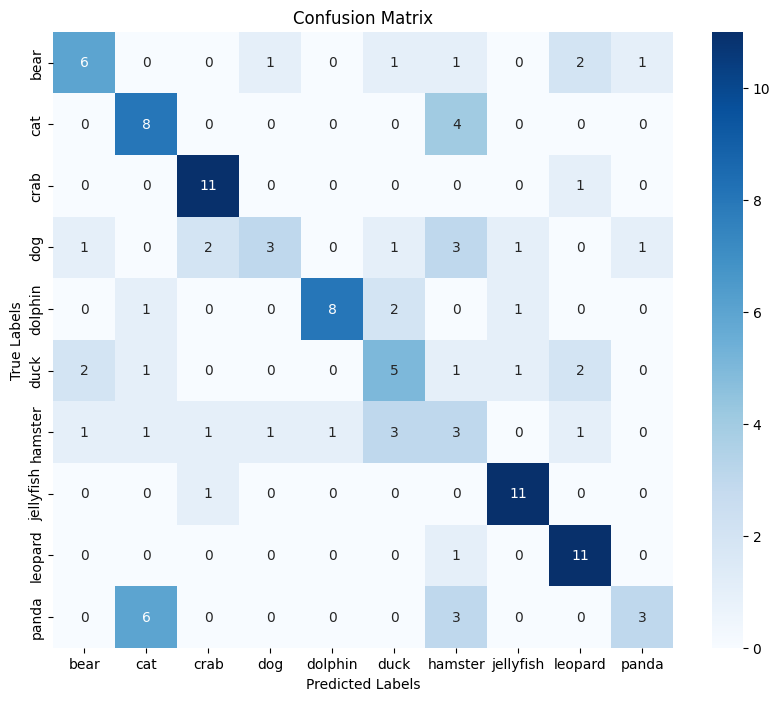

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming you have already trained and evaluated your model

# Make predictions on the test set
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

# Convert true labels to integer format
true_labels = np.argmax(y_test_one_hot, axis=1)

# Compute the confusion matrix
confusion_mat = confusion_matrix(true_labels, predicted_labels)

# Get the class labels
class_labels = label_encoder.classes_

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
